In [12]:
#Import all my dependencies at once
%matplotlib inline
style.use('fivethirtyeight')
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
#Create an engine for the `hawaii.sqlite` database
engine = create_engine("sqlite:///Homework 10/Resources/hawaii.sqlite")

#Create the base for sqlalchemy
Base = automap_base()
Base.prepare(engine, reflect=True)

#Save the tables into variables
Measure = Base.classes.measurement
Station = Base.classes.station

#Create the session
session = Session(engine)

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


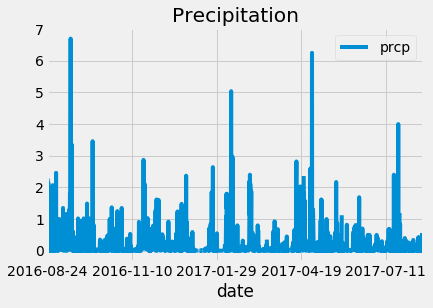

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
newestdate = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
newestdate = newestdate[0]
year = newestdate.split('-')[0]
monf = newestdate.split('-')[1]
day = newestdate.split('-')[2]
yearold = int(year) - 1
yearago = dt.datetime(yearold, int(monf), int(day))

# Perform a query to retrieve the data and precipitation scores
percipitaion = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yearago).order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(percipitaion)
df = df.set_index('date')

# Sort the dataframe by date
df = df.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation", grid = True)

# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

In [64]:
# Design a query to show how many stations are available in this dataset?
numstations = session.query(Station).count()
print(numstations)

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
                  .order_by(func.count(Measurement.station).desc()).all())
activestations

9


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

stationid = activestations[0][0]
highest = (session.query(Measurement.tobs).filter(Measurement.station == stationid).order_by(Measurement.tobs.desc()).first())
highest = highest[0]

lowest = (session.query(Measurement.tobs).filter(Measurement.station == stationid).order_by(Measurement.tobs.asc()).first())
lowest = lowest[0]

average = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == stationid)).first()
average = average[0]

print(f"{highest} {lowest} {average}")

85.0 54.0 71.66378066378067


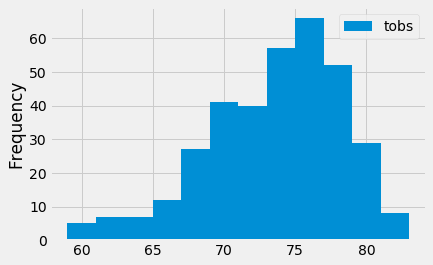

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearago)
            .filter(Measurement.station == stationid).order_by(Measurement.date).all())

df = pd.DataFrame(temperature)
df = df.set_index('date')
df = df.sort_index(ascending=True)

df.plot(kind='hist', bins=12)

In [79]:
# Please dont make me use SQLAlchemy again, querying off this is very confusing, I feel much more confident on it though
# Still not very confident on making nice graphs or using datetime but a lot netter on it